In [17]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Insurance.csv')  # Make sure the path to the CSV file is correct
print(data.head())  # Print the first 5 rows to inspect the data


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


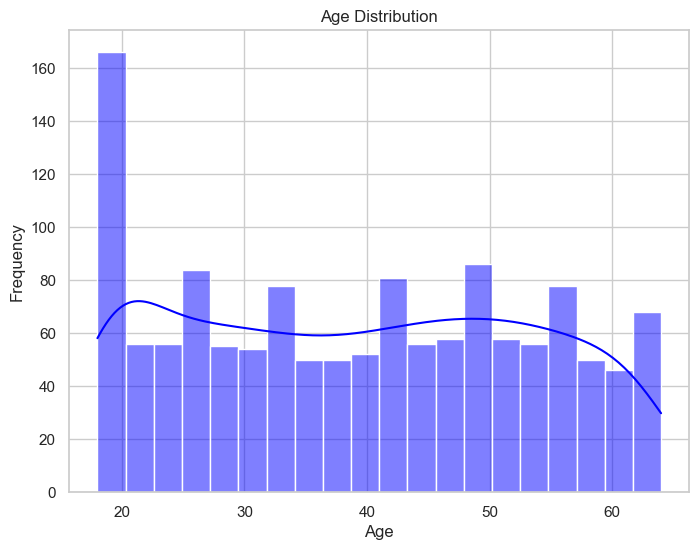

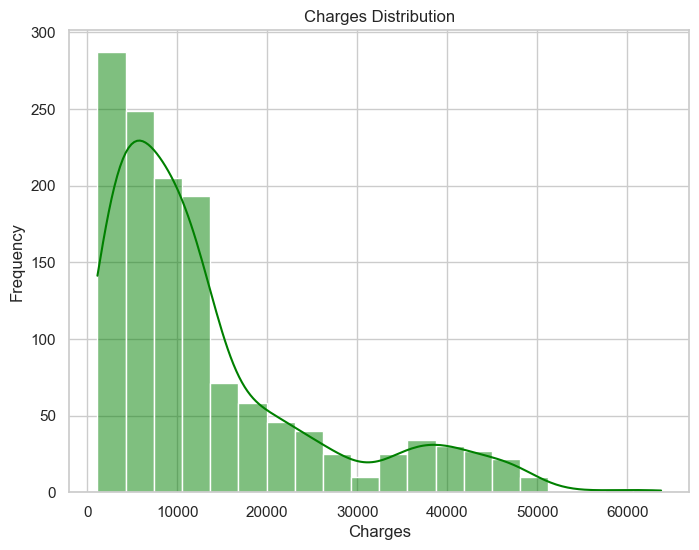

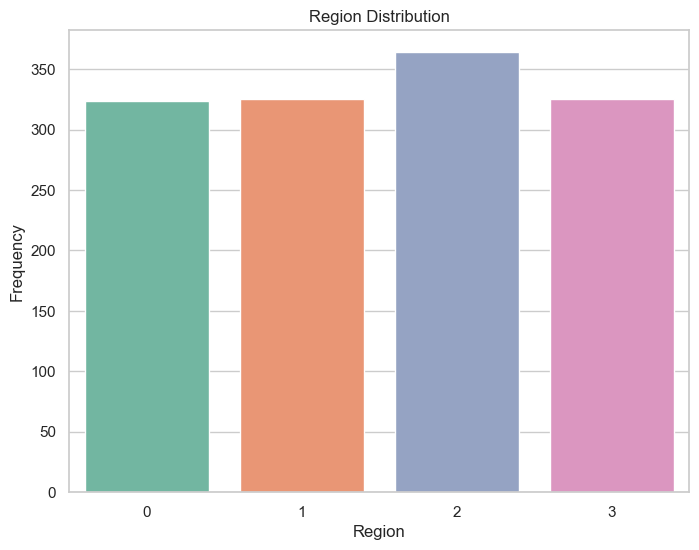

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Plot Age Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['age'], kde=True, bins=20, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plot Charges Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['charges'], kde=True, bins=20, color='green')
plt.title('Charges Distribution')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

# Plot Region Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='region', data=data, hue='region', palette='Set2', legend=False)
plt.title('Region Distribution')
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.show()


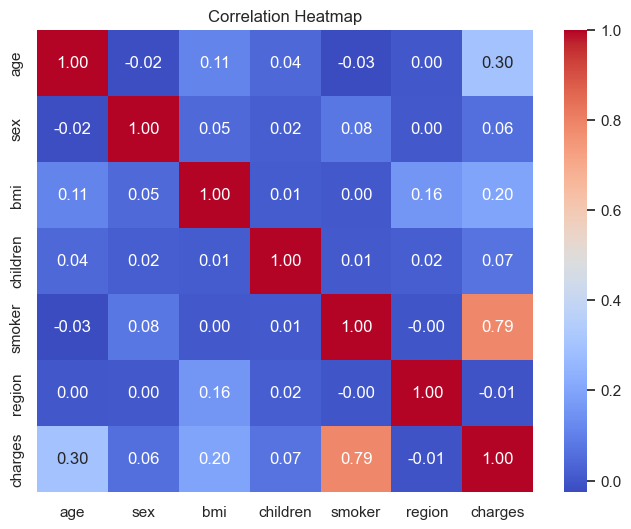

In [59]:
# Select only the numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()



In [41]:
# Summary statistics of the dataset
print(data.describe())



               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()

data['sex'] = label_encoder.fit_transform(data['sex'])
data['smoker'] = label_encoder.fit_transform(data['smoker'])
data['region'] = label_encoder.fit_transform(data['region'])

# Define feature columns (independent variables) and target (dependent variable)
X = data[['age', 'bmi', 'children', 'sex', 'smoker', 'region']]
y = data['charges']



In [63]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse}')


Root Mean Squared Error (RMSE): 5799.587091438356


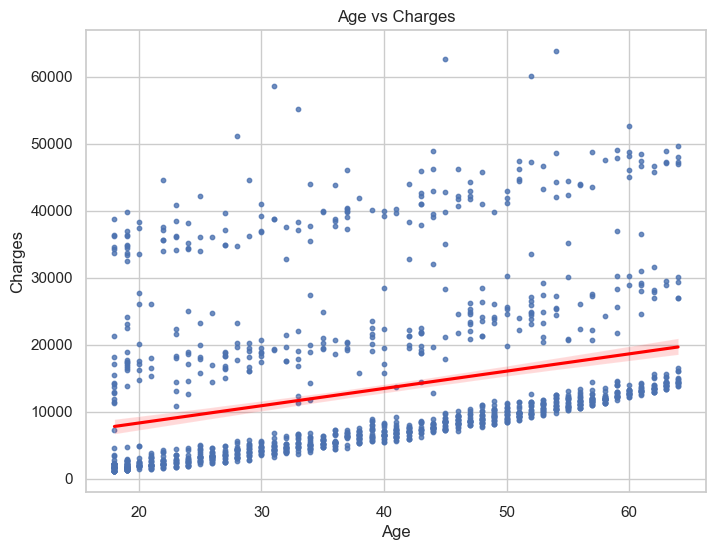

In [69]:
# Plot a regression line to show the relationship between age and charges
plt.figure(figsize=(8, 6))
sns.regplot(x='age', y='charges', data=data, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()


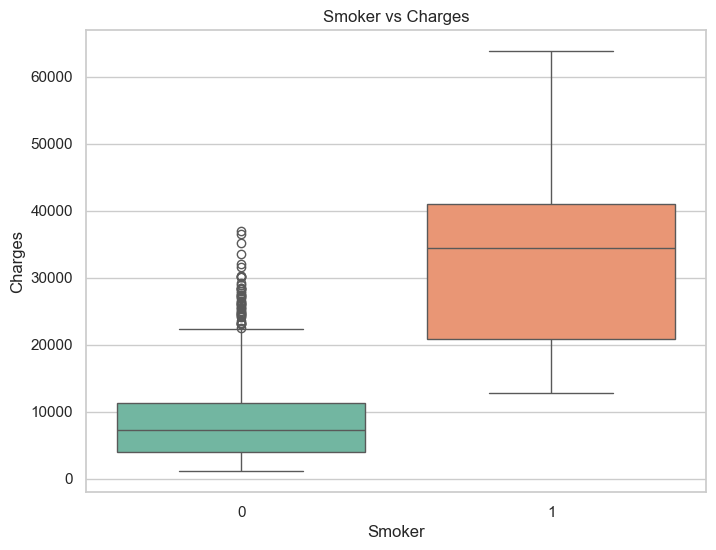

In [71]:
# Plot charges by smoker status with updated palette usage
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='charges', data=data, hue='smoker', palette='Set2', legend=False)
plt.title('Smoker vs Charges')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()
